In [2]:
import util as u
import pandas as pd
import pyBigWig
import numpy as np
import seaborn as sns
import re
from liftover import get_lifter
from bisect import bisect_left
import matplotlib.pyplot as plt

data='/labs/mpsnyder/moqri/data/index/'

def arr(df):
    manh=man.loc[df.index.intersection(man.index)]
    print(manh.shape)
    ll=manh[['probeID']]
    ll=ll[ll.probeID.isin(b.columns)]
    ll['dq']=df.loc[ll.index].dq
    print(ll.shape)
    bs=b[ll.probeID].T
    bs['dq']=ll.dq.values
    pl=bs.groupby('dq').mean()
    pl.index=list(range(-2500,2501,500))
    pl.columns=pl.columns.rename('Liver Age')
    pl.columns=['20s Years','30s Years','40s Years','50s Years']
    scl=sc.loc[ll.probeID]
    scl['dq']=ll.dq.values
    sc1=scl[list(meta[meta.index.str.contains('ES__')]['!Sample_geo_accession'].values)+['dq']].groupby('dq').mean().mean(1)
    sc2=scl[list(meta[meta.index.str.contains('iPS__')]['!Sample_geo_accession'].values)+['dq']].groupby('dq').mean().mean(1)
    scg=pd.concat([sc1,sc2],1)
    scg.index=pl.index
    scg.columns=['hESC','iPSC']
    pls=pd.concat([scg,pl],1)
    ax=sns.lineplot(data=pls,dashes=False,hue_order=['50s Years','40s Years','30s Years','20s Years','iPSC','hESC'],
                    palette = sns.color_palette("RdYlGn", 4)+["#0000FF","#180e17"])

In [45]:
an=pd.read_csv(data+'wg/ann.csv',index_col=0)
an['dq']=pd.qcut(an.d,11)
an.columns=['h9']+list(an.columns)[1:]
an.shape
dl=an[an.h9<.2]
dh=an[an.h9>.6]
dle=dl[dl.ezh.notna()].drop(['g','tss','d'],axis=1)
dho=dh[dh.flank.str[0].isin(['A','T'])&dh.flank.str[3].isin(['A','T'])].drop(['g','tss','d'],axis=1)

In [136]:
man=pd.read_table(data+'ref/man450.tsv')
man=man[~man.CpG_chrm.isna()][man.CpG_chrm!='chrX'][man.CpG_chrm!='chrY'][man.CpG_chrm!='chrM']
man['CpG_chrm']=man.CpG_chrm.str[3:].astype(float)
man.index=man.CpG_chrm.astype(int).astype(str)+'_'+man.CpG_beg.astype(int).astype(str)

<ipython-input-136-3cc7a1065a4d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  man=man[~man.CpG_chrm.isna()][man.CpG_chrm!='chrX'][man.CpG_chrm!='chrY'][man.CpG_chrm!='chrM']


In [5]:
sc_='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE31nnn/GSE31848/matrix/GSE31848_series_matrix.txt.gz'
meta=pd.read_table(sc_,skiprows=52,nrows=1,index_col=0)
meta=meta.T
sc=pd.read_table(sc_,skiprows=37+55,index_col=0)

In [133]:
liver450='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE48nnn/GSE48325/matrix/GSE48325_series_matrix.txt.gz'
!wget -q -nc {liver450} -O {data}450\liver450.gz
liver=pd.read_csv(liver450, index_col=0,sep='\t', skiprows=60,nrows=10**6)
liver=liver.drop('!series_matrix_table_end')
print(liver.shape)
l_ages=pd.read_csv(liver450, index_col=0,sep='\t', skiprows=27,nrows=9).iloc[8].str.strip('age: ').astype(float)

(485577, 85)


<AxesSubplot:>

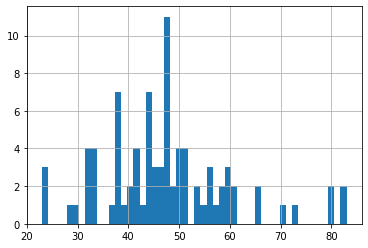

In [134]:
b=liver.T
b['age']=l_ages
b.age.hist(bins=50)
#b['age']=pd.qcut(b.age,10)
#b=b.groupby('age').mean()

In [8]:
#b=b.sort_values('age')

In [137]:
    df=dle
    manh=man.loc[df.index.intersection(man.index)]
    print(manh.shape)
    ll=manh[['probeID']]
    ll=ll[ll.probeID.isin(b.columns)]
    ll['dq']=df.loc[ll.index].dq
    print(ll.shape)
    bs=b[ll.probeID].T

(11707, 57)
(11707, 2)


In [60]:
dt=pd.concat([b.age,bs.mean()],1)

<ipython-input-60-bc207a1cc668>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  dt=pd.concat([b.age,bs.mean()],1)


<AxesSubplot:xlabel='age', ylabel='0'>

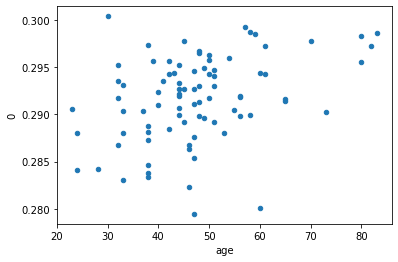

In [61]:
dt.plot.scatter('age',0)

<AxesSubplot:xlabel='age', ylabel='0'>

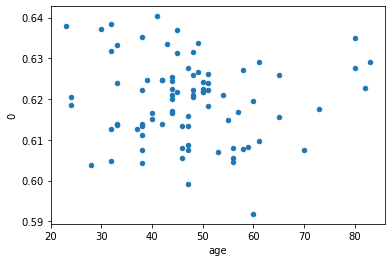

In [49]:
dt.plot.scatter('age',0)

In [70]:
b.drop('age',1).mean(1)

<ipython-input-70-4ee92a6f3073>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  b.drop('age',1).mean(1)


GSM1174842    0.487105
GSM1174879    0.478231
GSM1174857    0.480408
GSM1174869    0.472949
GSM1174910    0.493015
                ...   
GSM1174894    0.482463
GSM1174845    0.489645
GSM1174844    0.489168
GSM1174838    0.486606
GSM1174843    0.489484
Length: 85, dtype: float64

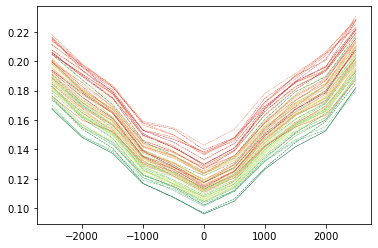

In [64]:
    bs['dq']=ll.dq.values
    pl=bs.groupby('dq').mean()
    pl.index=list(range(-2500,2501,500))
    pl.columns=pl.columns.rename('Liver Age')
    ax=sns.lineplot(data=pl,palette=reversed(sns.color_palette("RdYlGn",85)),linewidth = 0.5,legend=False)

In [74]:
ho='https://static-content.springer.com/esm/art%3A10.1186%2Fgb-2013-14-10-r115/MediaObjects/13059_2013_3156_MOESM3_ESM.csv'
ho=pd.read_csv(ho,skiprows=2,index_col=0)

In [87]:
ho=ho.drop('(Intercept)')['CoefficientTraining']

In [81]:
b=b[b.columns[b.columns.isin(ho.index)]]

In [90]:
b=b[ho.index]

In [120]:
m=[]
for i,r in b.iterrows():
    m.append(10**((r*ho).sum()+0.695507258))

In [143]:
ho[ho.index.isin(bs.index)]

CpGmarker
cg04084157    1.034144
cg04528819    0.771798
cg05675373    0.346356
cg06557358   -0.141331
cg08370996    0.812908
cg09191327   -0.278394
cg10281002    0.468417
cg10486998   -0.389336
cg17285325    0.137316
cg19167673   -0.470380
cg19478743    0.122669
cg21460081   -0.150207
cg26045434   -0.296285
cg26372517    0.126026
cg26842024    0.358162
cg27494383    0.064597
cg07663789   -0.074790
cg07849904   -0.116543
cg09441152   -0.683076
cg09722397   -0.147296
cg25101936   -0.057745
cg25928579   -0.030299
Name: CoefficientTraining, dtype: float64